In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import os
import joblib
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

In [2]:
plt.rcParams["axes.unicode_minus"] = False

if platform.system() == "Darwin":  # macOS
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":  # Windows
    font_path = "C:/Windows/Fonts/malgun.ttf"  # ÎßëÏùÄ Í≥†Îîï
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc("font", family=font_name)
elif platform.system() == "Linux":  # Linux (Ubuntu, Docker Îì±)
    font_path = "fonts/NanumGothic.ttf"
    if not os.path.exists(font_path):
        st.error("NanumGothic.ttf Ìè∞Ìä∏ ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. 'fonts' Ìè¥Îçî ÎÇ¥Ïóê Ìè∞Ìä∏ ÌååÏùºÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc("font", family=font_name)

#### ÏßÄÏó≠Î≥Ñ ÏàòÏ∂úÎüâ ÏòàÏ∏° Î™®Îç∏

üöÄ Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§.
Epoch 1/600


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - loss: 0.2698 
Epoch 2/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.2105 
Epoch 3/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1451 
Epoch 4/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0739 
Epoch 5/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0326 
Epoch 6/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0339 
Epoch 7/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0270 
Epoch 8/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0225 
Epoch 9/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0237 
Epoch 10/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Í∑∏ÎûòÌîÑÍ∞Ä '../../images/result/ÎØ∏Íµ≠ LSTM ÏßÄÏó≠Î≥Ñ ÏàòÏ∂úÎüâ ÏòàÏ∏°_12Í∞úÏõî.png'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


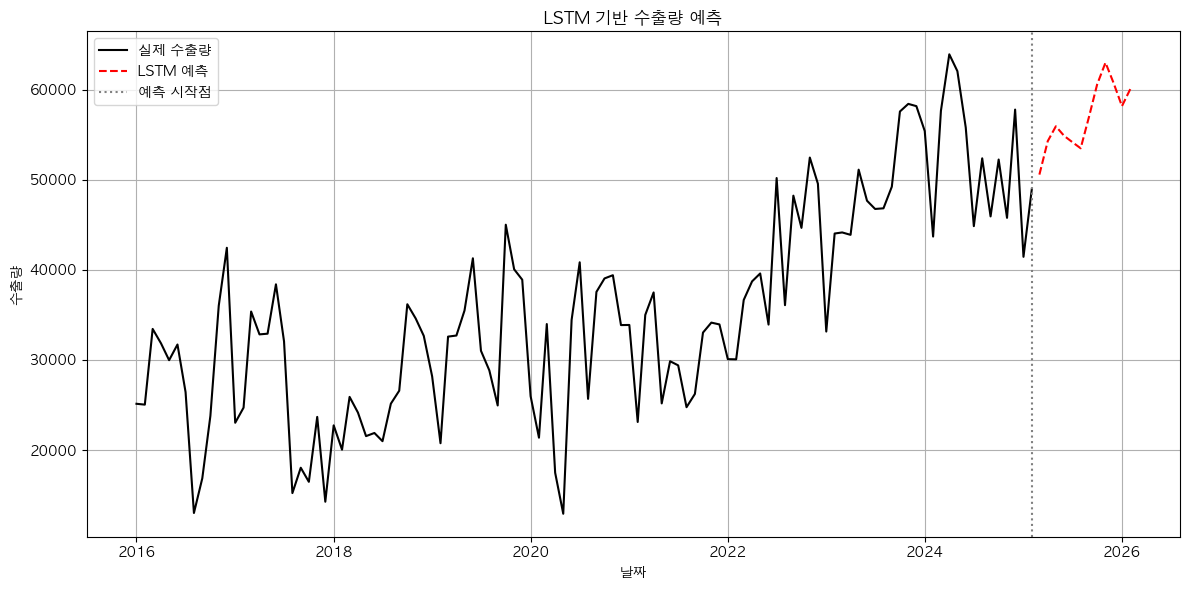

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib
import os
import tensorflow as tf

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Ìï®Ïàò
def prepare_lstm_data(series, time_steps=12):
    values = series['y'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    X, y = [], []
    for i in range(time_steps, len(scaled)):
        X.append(scaled[i-time_steps:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
def train_lstm_model(X, y, units=50, epochs=600, batch_size=16, region_name=None):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏúÑÌïú ÏΩúÎ∞± ÌÅ¥ÎûòÏä§ Ï†ïÏùò
    class EarlyStoppingByLoss(tf.keras.callbacks.Callback):
        def __init__(self, region_name):
            super(EarlyStoppingByLoss, self).__init__()
            self.region_name = region_name
            
        def on_epoch_end(self, epoch, logs=None):
            current_loss = logs.get('loss')
            if current_loss is not None and current_loss <= 0.01:
                print(f"\nüéâ Ï°∞Í∏∞ Ï¢ÖÎ£å: epoch {epoch+1}ÏóêÏÑú lossÍ∞Ä 0.01 Ïù¥Ìïò({current_loss:.4f})Î°ú Îñ®Ïñ¥Ïßê")
                # Î™®Îç∏ Ï†ÄÏû•
                model_path = get_model_path(self.region_name)
                scaler_path = get_scaler_path(self.region_name)
                self.model.save(model_path)
                print(f"üíæ Î™®Îç∏Ïù¥ {model_path}Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
                self.model.stop_training = True
    
    # ÏΩúÎ∞± Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
    early_stopping = EarlyStoppingByLoss(region_name)
    
    history = model.fit(
        X, y, 
        epochs=epochs, 
        batch_size=batch_size, 
        verbose=1,
        callbacks=[early_stopping]
    )
    
    return model

# 3. ÎØ∏Îûò ÏòàÏ∏°
def forecast_lstm(model, series, forecast_months, scaler, time_steps=12):
    data = scaler.transform(series['y'].values.reshape(-1, 1))
    last_sequence = data[-time_steps:]

    predictions = []
    for _ in range(forecast_months):
        input_seq = last_sequence.reshape(1, time_steps, 1)
        pred = model.predict(input_seq, verbose=0)
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred, axis=0)

    forecast_scaled = np.array(predictions).reshape(-1, 1)
    forecast_values = scaler.inverse_transform(forecast_scaled)

    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_months, freq='MS')

    result = pd.DataFrame({
        'Ïó∞ÎèÑ': future_dates.year,
        'Ïõî': future_dates.month,
        'ÏòàÏ∏° ÏàòÏ∂úÎüâ': forecast_values.flatten()
    })
    return result

# 4. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_lstm_forecast(series, forecast_df, region_name, forecast_months, save_path=None):
    forecast_index = pd.to_datetime(forecast_df['Ïó∞ÎèÑ'].astype(str) + '-' + forecast_df['Ïõî'].astype(str))
    forecast_values = forecast_df['ÏòàÏ∏° ÏàòÏ∂úÎüâ'].values

    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series['y'], label='Ïã§Ï†ú ÏàòÏ∂úÎüâ', color='black')
    plt.plot(forecast_index, forecast_values, label='LSTM ÏòàÏ∏°', color='red', linestyle='--')
    plt.axvline(x=series.index[-1], color='gray', linestyle=':', label='ÏòàÏ∏° ÏãúÏûëÏ†ê')
    plt.title("LSTM Í∏∞Î∞ò ÏàòÏ∂úÎüâ ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel("ÏàòÏ∂úÎüâ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = f"../../images/result/{region_name} LSTM ÏßÄÏó≠Î≥Ñ ÏàòÏ∂úÎüâ ÏòàÏ∏°_{forecast_months}Í∞úÏõî.png"

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if save_path:
        plt.savefig(save_path, dpi=300)  # Ìï¥ÏÉÅÎèÑ Ï°∞Ï†ï Í∞ÄÎä•
        print(f"Í∑∏ÎûòÌîÑÍ∞Ä '{save_path}'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    plt.show()

# Î™®Îç∏ Î∞è Ïä§ÏºÄÏùºÎü¨ Í≤ΩÎ°ú Ìï®Ïàò
def get_model_path(region_name):
    return f"../../models/lstm_region_{region_name}_model.h5"

def get_scaler_path(region_name):
    return f"../../models/lstm_region_{region_name}_scaler.pkl"

def ensure_model(region_name):
    model_path = get_model_path(region_name)
    scaler_path = get_scaler_path(region_name)

    if os.path.exists(model_path) and os.path.exists(scaler_path):
        print(f"‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Í≥º Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§: {model_path}")
        return True
    else:
        print(f"üöÄ Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§.")
        return False

# 5. Ïã§Ìñâ ÏòàÏãú
file_path = "../../data/processed/ÏßÄÏó≠Î≥ÑÌåêÎß§ Î≥µÏÇ¨Î≥∏.csv"
df = pd.read_csv(file_path)

# Ï†ÑÏ≤òÎ¶¨: ÏßÄÏó≠Î™Ö + ÎåÄÎ•ô ÌÜµÌï©
df = df.drop(columns=['ÎåÄÎ•ô'])
cols = ['ÏßÄÏó≠Î™Ö'] + [col for col in df.columns if col != 'ÏßÄÏó≠Î™Ö']
df = df[cols]

region_name = "ÎØ∏Íµ≠"
forecast_months = 12

region_data = df[df['ÏßÄÏó≠Î™Ö'] == region_name].iloc[:, 1:].T
region_data.columns = ['y']
region_data.index = pd.to_datetime(region_data.index)
region_data = region_data.asfreq('MS')
region_data['y'] = pd.to_numeric(region_data['y'], errors='coerce')
region_data = region_data.dropna()

status = ensure_model(region_name)

if status:
    lstm_model = load_model(get_model_path(region_name), compile=False)
    scaler = joblib.load(get_scaler_path(region_name))
else:
    X, y, scaler = prepare_lstm_data(region_data)
    lstm_model = train_lstm_model(X, y, region_name=region_name)
    # Î™®Îç∏Ïù¥ Ï°∞Í∏∞ Ï¢ÖÎ£åÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ÏóêÎßå Ïó¨Í∏∞ÏÑú Ï†ÄÏû•
    if not os.path.exists(get_model_path(region_name)):
        lstm_model.save(get_model_path(region_name))
        joblib.dump(scaler, get_scaler_path(region_name))

lstm_forecast = forecast_lstm(lstm_model, region_data, forecast_months, scaler)
plot_lstm_forecast(region_data, lstm_forecast, region_name, forecast_months)

#### Ï∞®Ï¢ÖÎ≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏° Î™®Îç∏

üöÄ Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§.
Epoch 1/600


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.2818  
Epoch 2/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.2334 
Epoch 3/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.1640 
Epoch 4/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.1353 
Epoch 5/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0723 
Epoch 6/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0457 
Epoch 7/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0525 
Epoch 8/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0446 
Epoch 9/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0415 
Epoch 10/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Í∑∏ÎûòÌîÑÍ∞Ä '../../images/result/G80-ÎÇ¥Ïàò LSTM Ï∞®Ï¢ÖÎ≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°_12Í∞úÏõî.png'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


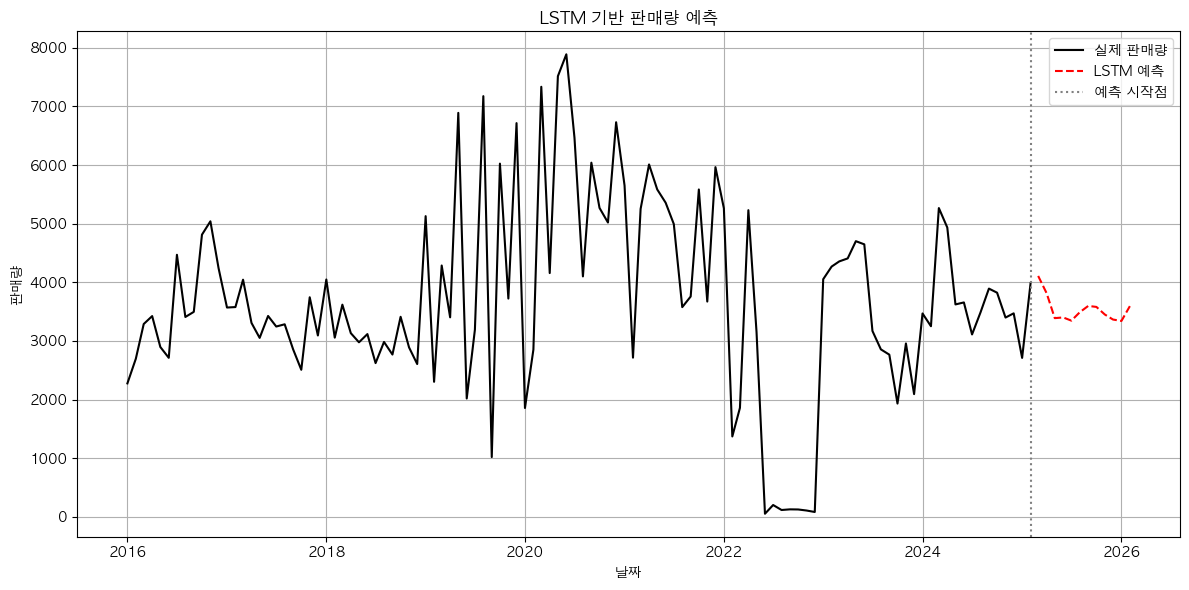

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Ìï®Ïàò
def prepare_lstm_data(series, time_steps=12):
    values = series['y'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    X, y = [], []
    for i in range(time_steps, len(scaled)):
        X.append(scaled[i-time_steps:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
def train_lstm_model(X, y, units=50, epochs=600, batch_size=16, car_name=None):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏúÑÌïú ÏΩúÎ∞± ÌÅ¥ÎûòÏä§ Ï†ïÏùò
    class EarlyStoppingByLoss(tf.keras.callbacks.Callback):
        def __init__(self, car_name):
            super(EarlyStoppingByLoss, self).__init__()
            self.car_name = car_name
            
        def on_epoch_end(self, epoch, logs=None):
            current_loss = logs.get('loss')
            if current_loss is not None and current_loss <= 0.01:
                print(f"\nüéâ Ï°∞Í∏∞ Ï¢ÖÎ£å: epoch {epoch+1}ÏóêÏÑú lossÍ∞Ä 0.01 Ïù¥Ìïò({current_loss:.4f})Î°ú Îñ®Ïñ¥Ïßê")
                # Î™®Îç∏ Ï†ÄÏû•
                model_path = get_model_path(self.car_name)
                scaler_path = get_scaler_path(self.car_name)
                self.model.save(model_path)
                print(f"üíæ Î™®Îç∏Ïù¥ {model_path}Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
                self.model.stop_training = True
    
    # ÏΩúÎ∞± Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
    early_stopping = EarlyStoppingByLoss(car_name)
    
    history = model.fit(
        X, y, 
        epochs=epochs, 
        batch_size=batch_size, 
        verbose=1,
        callbacks=[early_stopping]
    )
    
    return model

# 3. ÎØ∏Îûò ÏòàÏ∏°
def forecast_lstm(model, series, forecast_months, scaler, time_steps=12):
    data = scaler.transform(series['y'].values.reshape(-1, 1))
    last_sequence = data[-time_steps:]

    predictions = []
    for _ in range(forecast_months):
        input_seq = last_sequence.reshape(1, time_steps, 1)
        pred = model.predict(input_seq, verbose=0)
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred, axis=0)

    forecast_scaled = np.array(predictions).reshape(-1, 1)
    forecast_values = scaler.inverse_transform(forecast_scaled)

    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_months, freq='MS')

    result = pd.DataFrame({
        'Ïó∞ÎèÑ': future_dates.year,
        'Ïõî': future_dates.month,
        'ÏòàÏ∏° ÌåêÎß§Îüâ': forecast_values.flatten()
    })
    return result

# 4. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_lstm_forecast(series, forecast_df, car_name, forecast_months, save_path=None):
    forecast_index = pd.to_datetime(forecast_df['Ïó∞ÎèÑ'].astype(str) + '-' + forecast_df['Ïõî'].astype(str))
    forecast_values = forecast_df['ÏòàÏ∏° ÌåêÎß§Îüâ'].values

    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series['y'], label='Ïã§Ï†ú ÌåêÎß§Îüâ', color='black')
    plt.plot(forecast_index, forecast_values, label='LSTM ÏòàÏ∏°', color='red', linestyle='--')
    plt.axvline(x=series.index[-1], color='gray', linestyle=':', label='ÏòàÏ∏° ÏãúÏûëÏ†ê')
    plt.title("LSTM Í∏∞Î∞ò ÌåêÎß§Îüâ ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel("ÌåêÎß§Îüâ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = f"../../images/result/{car_name} LSTM Ï∞®Ï¢ÖÎ≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°_{forecast_months}Í∞úÏõî.png"

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if save_path:
        plt.savefig(save_path, dpi=300)  # Ìï¥ÏÉÅÎèÑ Ï°∞Ï†ï Í∞ÄÎä•
        print(f"Í∑∏ÎûòÌîÑÍ∞Ä '{save_path}'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    plt.show()

# 5. Ïã§Ìñâ ÏòàÏãú
file_path = "../../data/processed/Ï∞®Ï¢ÖÎ≥ÑÌåêÎß§ Î≥µÏÇ¨Î≥∏.csv"
df = pd.read_csv(file_path)

# Ï†ÑÏ≤òÎ¶¨: Ïù∏Îç±Ïä§ ÌÜµÌï©
df['Ï∞®Ï¢Ö'] = df['Ï∞®Ï¢Ö'].astype(str) + '-' + df['Í±∞Îûò Íµ¨Î∂Ñ'].astype(str).str.zfill(2)
df = df.drop(columns=['Ï∞®Îüâ Ïú†Ìòï', 'Í±∞Îûò Íµ¨Î∂Ñ'])
cols = ['Ï∞®Ï¢Ö'] + [col for col in df.columns if col != 'Ï∞®Ï¢Ö']
df = df[cols]

car_name = "G80-ÎÇ¥Ïàò"
forecast_months = 12

car_data = df[df['Ï∞®Ï¢Ö'] == car_name].iloc[:, 1:].T
car_data.columns = ['y']
car_data.index = pd.to_datetime(car_data.index)
car_data = car_data.asfreq('MS')
car_data['y'] = pd.to_numeric(car_data['y'], errors='coerce')
car_data = car_data.dropna()

def get_model_path(car_name):
    return f"../../models/lstm_car_{car_name}_model.h5"

def get_scaler_path(car_name):
    return f"../../models/lstm_car_{car_name}_scaler.pkl"

def ensure_model(car_name):
    model_path = get_model_path(car_name)
    scaler_path = get_scaler_path(car_name)

    if os.path.exists(model_path) and os.path.exists(scaler_path):
        print(f"‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Í≥º Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§: {model_path}")
        return True
    else:
        print(f"üöÄ Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§.")
        return False

status = ensure_model(car_name)

if status:
    lstm_model = load_model(f"../../models/lstm_car_{car_name}_model.h5", compile=False)
    scaler = joblib.load(f"../../models/lstm_car_{car_name}_scaler.pkl")
else:
    X, y, scaler = prepare_lstm_data(car_data)
    lstm_model = train_lstm_model(X, y, car_name=car_name)
    # Î™®Îç∏Ïù¥ Ï°∞Í∏∞ Ï¢ÖÎ£åÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ÏóêÎßå Ïó¨Í∏∞ÏÑú Ï†ÄÏû•
    if not os.path.exists(get_model_path(car_name)):
        lstm_model.save(get_model_path(car_name))
        joblib.dump(scaler, get_scaler_path(car_name))

lstm_forecast = forecast_lstm(lstm_model, car_data, forecast_months, scaler)
plot_lstm_forecast(car_data, lstm_forecast, car_name, forecast_months)

#### Í≥µÏû•Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏° Î™®Îç∏

üöÄ Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§.
Epoch 1/600


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.1542  
Epoch 2/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0864 
Epoch 3/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0298 
Epoch 4/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0253 
Epoch 5/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0215 
Epoch 6/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0210 
Epoch 7/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0242 
Epoch 8/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0211 
Epoch 9/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0225 
Epoch 10/600
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Í∑∏ÎûòÌîÑÍ∞Ä '../../images/result/Ïù∏ÎèÑ-Eon-ÎÇ¥Ïàò LSTM Í≥µÏû•Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°_12Í∞úÏõî.png'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


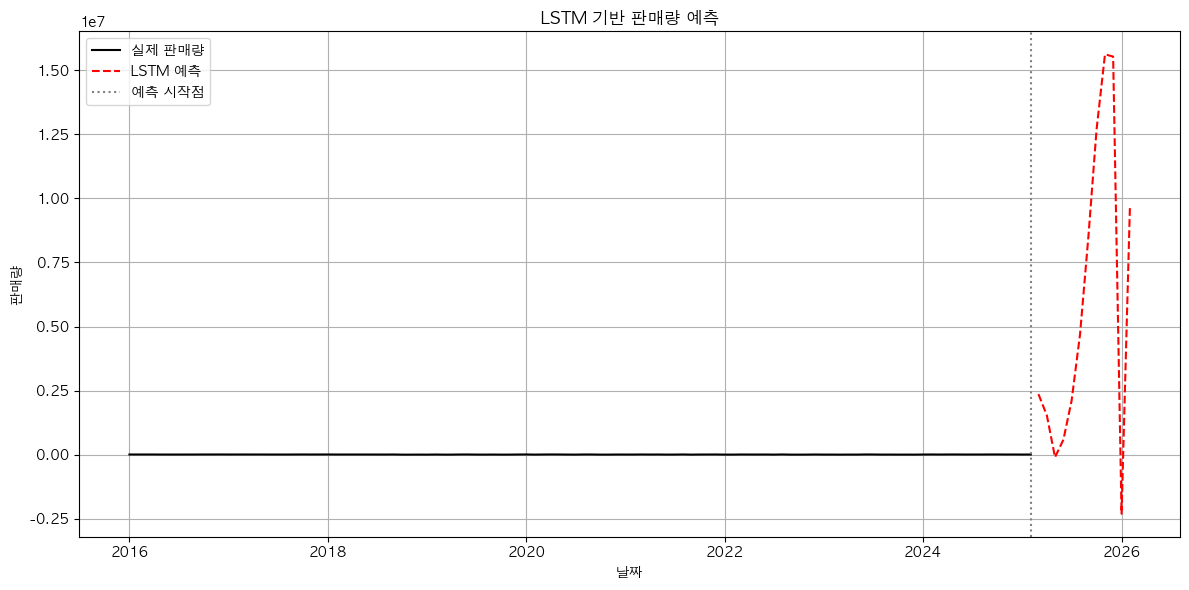

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Ìï®Ïàò
def prepare_lstm_data(series, time_steps=12):
    values = series['y'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    X, y = [], []
    for i in range(time_steps, len(scaled)):
        X.append(scaled[i-time_steps:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
def train_lstm_model(X, y, units=50, epochs=600, batch_size=16, plant_name=None):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏúÑÌïú ÏΩúÎ∞± ÌÅ¥ÎûòÏä§ Ï†ïÏùò
    class EarlyStoppingByLoss(tf.keras.callbacks.Callback):
        def __init__(self, plant_name):
            super(EarlyStoppingByLoss, self).__init__()
            self.plant_name = plant_name
            
        def on_epoch_end(self, epoch, logs=None):
            current_loss = logs.get('loss')
            if current_loss is not None and current_loss <= 0.01:
                print(f"\nüéâ Ï°∞Í∏∞ Ï¢ÖÎ£å: epoch {epoch+1}ÏóêÏÑú lossÍ∞Ä 0.01 Ïù¥Ìïò({current_loss:.4f})Î°ú Îñ®Ïñ¥Ïßê")
                # Î™®Îç∏ Ï†ÄÏû•
                model_path = get_model_path(self.plant_name)
                scaler_path = get_scaler_path(self.plant_name)
                self.model.save(model_path)
                print(f"üíæ Î™®Îç∏Ïù¥ {model_path}Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
                self.model.stop_training = True
    
    # ÏΩúÎ∞± Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
    early_stopping = EarlyStoppingByLoss(plant_name)
    
    history = model.fit(
        X, y, 
        epochs=epochs, 
        batch_size=batch_size, 
        verbose=1,
        callbacks=[early_stopping]
    )
    
    return model

# 3. ÎØ∏Îûò ÏòàÏ∏°
def forecast_lstm(model, series, forecast_months, scaler, time_steps=12):
    data = scaler.transform(series['y'].values.reshape(-1, 1))
    last_sequence = data[-time_steps:]

    predictions = []
    for _ in range(forecast_months):
        input_seq = last_sequence.reshape(1, time_steps, 1)
        pred = model.predict(input_seq, verbose=0)
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred, axis=0)

    forecast_scaled = np.array(predictions).reshape(-1, 1)
    forecast_values = scaler.inverse_transform(forecast_scaled)

    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_months, freq='MS')

    result = pd.DataFrame({
        'Ïó∞ÎèÑ': future_dates.year,
        'Ïõî': future_dates.month,
        'ÏòàÏ∏° ÌåêÎß§Îüâ': forecast_values.flatten()
    })
    return result

# 4. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_lstm_forecast(series, forecast_df, plant_name, forecast_months, save_path=None):
    forecast_index = pd.to_datetime(forecast_df['Ïó∞ÎèÑ'].astype(str) + '-' + forecast_df['Ïõî'].astype(str))
    forecast_values = forecast_df['ÏòàÏ∏° ÌåêÎß§Îüâ'].values

    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series['y'], label='Ïã§Ï†ú ÌåêÎß§Îüâ', color='black')
    plt.plot(forecast_index, forecast_values, label='LSTM ÏòàÏ∏°', color='red', linestyle='--')
    plt.axvline(x=series.index[-1], color='gray', linestyle=':', label='ÏòàÏ∏° ÏãúÏûëÏ†ê')
    plt.title("LSTM Í∏∞Î∞ò ÌåêÎß§Îüâ ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel("ÌåêÎß§Îüâ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = f"../../images/result/{plant_name} LSTM Í≥µÏû•Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°_{forecast_months}Í∞úÏõî.png"

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if save_path:
        plt.savefig(save_path, dpi=300)  # Ìï¥ÏÉÅÎèÑ Ï°∞Ï†ï Í∞ÄÎä•
        print(f"Í∑∏ÎûòÌîÑÍ∞Ä '{save_path}'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    plt.show()

# 5. Ïã§Ìñâ ÏòàÏãú
file_path = "../../data/processed/Í≥µÏû•Î≥ÑÌåêÎß§ Î≥µÏÇ¨Î≥∏.csv"
df = pd.read_csv(file_path)

# Ï†ÑÏ≤òÎ¶¨: Ïù∏Îç±Ïä§ ÌÜµÌï©
df['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'] = df['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'].astype(str) + '-' + df['Ï∞®Ï¢Ö'].astype(str).str.zfill(2) + '-' + df['Í±∞Îûò Íµ¨Î∂Ñ'].astype(str).str.zfill(2)
df = df.drop(columns=['Ï∞®Ï¢Ö', 'Í±∞Îûò Íµ¨Î∂Ñ'])
cols = ['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'] + [col for col in df.columns if col != 'Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)']
df = df[cols]

plant_name = "Ïù∏ÎèÑ-Eon-ÎÇ¥Ïàò"
forecast_months = 12

plant_data = df[df['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'] == plant_name].iloc[:, 1:].T
plant_data.columns = ['y']
plant_data.index = pd.to_datetime(plant_data.index)
plant_data = plant_data.asfreq('MS')
plant_data['y'] = pd.to_numeric(plant_data['y'], errors='coerce')
plant_data = plant_data.dropna()

def get_model_path(plant_name):
    return f"../../models/lstm_plant_{plant_name}_model.h5"

def get_scaler_path(plant_name):
    return f"../../models/lstm_plant_{plant_name}_scaler.pkl"

def ensure_model(plant_name):
    model_path = get_model_path(plant_name)
    scaler_path = get_scaler_path(plant_name)

    if os.path.exists(model_path) and os.path.exists(scaler_path):
        print(f"‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Í≥º Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§: {model_path}")
        return True
    else:
        print(f"üöÄ Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§.")
        return False

status = ensure_model(plant_name)

if status:
    lstm_model = load_model(f"../../models/lstm_plant_{plant_name}_model.h5", compile=False)
    scaler = joblib.load(f"../../models/lstm_plant_{plant_name}_scaler.pkl")
else:
    X, y, scaler = prepare_lstm_data(region_data)
    lstm_model = train_lstm_model(X, y, plant_name=plant_name)
    # Î™®Îç∏Ïù¥ Ï°∞Í∏∞ Ï¢ÖÎ£åÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ÏóêÎßå Ïó¨Í∏∞ÏÑú Ï†ÄÏû•
    if not os.path.exists(get_model_path(plant_name)):
        lstm_model.save(get_model_path(plant_name))
        joblib.dump(scaler, get_scaler_path(plant_name))

lstm_forecast = forecast_lstm(lstm_model, plant_data, forecast_months, scaler)
plot_lstm_forecast(plant_data, lstm_forecast, plant_name, forecast_months)

## ÏïÑÎûòÎäî Îçú Ï¢ãÏßÄÎßå Îπ†Î•∏ Î™®Îç∏

#### ÏßÄÏó≠Î≥Ñ ÏàòÏ∂úÎüâ Î™®Îç∏

‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Ïù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§: ../../models/sarimax_region_ÎØ∏Íµ≠_model.pkl


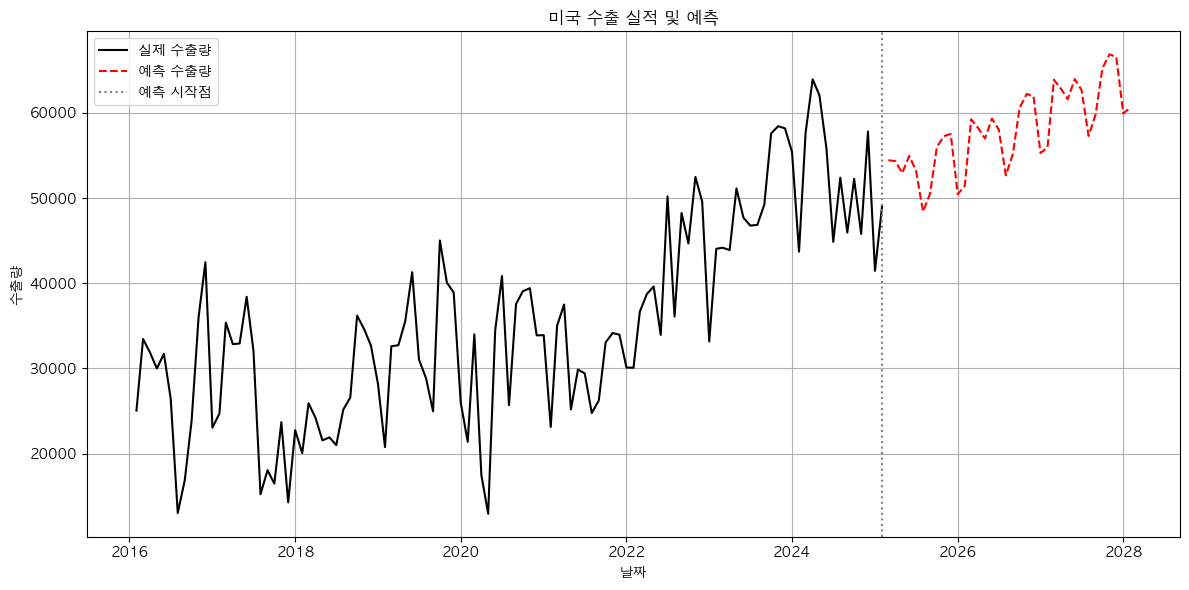

Í∑∏ÎûòÌîÑÍ∞Ä '../../images/result/ÎØ∏Íµ≠ SARIMAX ÏßÄÏó≠Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°.png'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import os
import joblib

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def prepare_region_series(df, region_name):
    region_data = df[df['ÏßÄÏó≠Î™Ö'] == region_name].iloc[:, 2:].T
    region_data.columns = ['y']
    region_data.index = pd.to_datetime(region_data.index)
    region_data = region_data.asfreq('MS')
    return region_data

def train_sarimax_model(series):
    # (p,d,q) = (1,1,1), (P,D,Q,s) = (1,1,1,12): Í∏∞Î≥∏ Í≥ÑÏ†àÏÑ± Î™®Îç∏
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fit_model = model.fit(disp=False)
    return fit_model

def forecast_future(fit_model, series, periods):
    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=periods, freq='MS')
    forecast = fit_model.get_forecast(steps=periods)
    forecast_mean = forecast.predicted_mean

    result = pd.DataFrame({
        'Ïó∞ÎèÑ': future_dates.year,
        'Ïõî': future_dates.month,
        'ÏòàÏ∏° ÏàòÏ∂úÎüâ': forecast_mean.values
    })
    return result

def plot_series_with_forecast(series, forecast_result, region_name, save_path=None):
    # Ïã§Ï†úÍ∞í
    actual = series.copy()
    
    # ÏòàÏ∏° ÎÇ†Ïßú Íµ¨ÏÑ±
    forecast_index = pd.to_datetime(forecast_result['Ïó∞ÎèÑ'].astype(str) + '-' + forecast_result['Ïõî'].astype(str))
    forecast_series = pd.Series(forecast_result['ÏòàÏ∏° ÏàòÏ∂úÎüâ'].values, index=forecast_index)
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual['y'], label='Ïã§Ï†ú ÏàòÏ∂úÎüâ', color='black')
    plt.plot(forecast_series.index, forecast_series.values, label='ÏòàÏ∏° ÏàòÏ∂úÎüâ', color='red', linestyle='--')
    
    plt.axvline(x=actual.index[-1], color='gray', linestyle=':', label='ÏòàÏ∏° ÏãúÏûëÏ†ê')
    plt.title(f"{region_name} ÏàòÏ∂ú Ïã§Ï†Å Î∞è ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel("ÏàòÏ∂úÎüâ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    save_path = f"../../images/result/{region_name} SARIMAX ÏßÄÏó≠Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°.png"

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if save_path:
        plt.savefig(save_path, dpi=300)  # Ìï¥ÏÉÅÎèÑ Ï°∞Ï†ï Í∞ÄÎä•
        print(f"Í∑∏ÎûòÌîÑÍ∞Ä '{save_path}'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    plt.show()



file_path = "../../data/processed/ÏßÄÏó≠Î≥ÑÌåêÎß§ Î≥µÏÇ¨Î≥∏.csv"  # Î≥∏Ïù∏ ÌôòÍ≤ΩÏóê ÎßûÍ≤å Í≤ΩÎ°ú ÏÑ§Ï†ï

df = load_data(file_path)

# Í∏∞Ï°¥ Ïª¨Îüº Ï†úÍ±∞
df = df.drop(columns=['ÎåÄÎ•ô'])

# 'ÎÇ†Ïßú' Ïª¨ÎüºÏùÑ Îß® ÏïûÏúºÎ°ú Ïù¥Îèô
cols = ['ÏßÄÏó≠Î™Ö'] + [col for col in df.columns if col != 'ÏßÄÏó≠Î™Ö']
df = df[cols]

region_name = "ÎØ∏Íµ≠"  # ÏûÖÎ†•Î∞õÏùÑ ÏßÄÏó≠Î™Ö
forecast_months = 36   # ÏòàÏ∏°Ìï† Í∞úÏõî Ïàò


def get_model_path(region_name):
    return f"../../models/sarimax_region_{region_name}_model.pkl"

def ensure_model(region_name):
    model_path = get_model_path(region_name)

    if os.path.exists(model_path):
        print(f"‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Ïù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§: {model_path}")
        return True
    else:
        print(f"üöÄ Î™®Îç∏Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§: {model_path}")
        return False

status = ensure_model(region_name)

if status:
    model = joblib.load(get_model_path(region_name))
else:
    region_series = prepare_region_series(df, region_name)
    model = train_sarimax_model(region_series)
    joblib.dump(model, f"../../models/sarimax_region_{region_name}_model.pkl")

forecast_result = forecast_future(model, region_series, forecast_months)
plot_series_with_forecast(region_series, forecast_result, region_name)

#### Ï∞®Ï¢ÖÎ≥Ñ ÌåêÎß§Îüâ Î™®Îç∏

üöÄ Î™®Îç∏Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§: ../../models/sarimax_car_G80-ÎÇ¥Ïàò_model.pkl


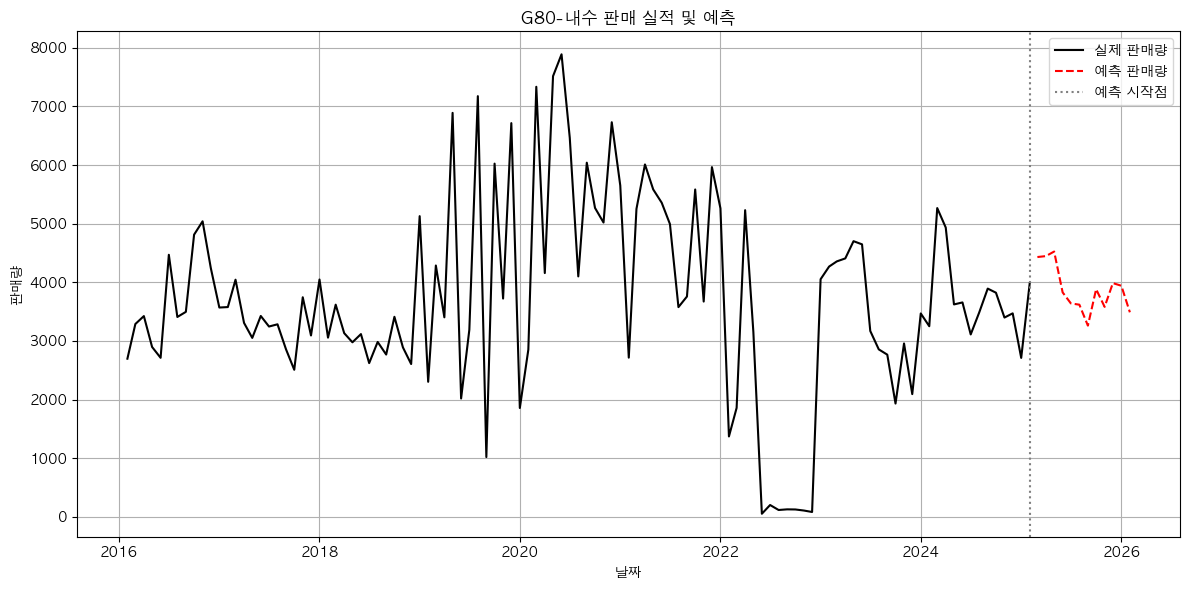

Í∑∏ÎûòÌîÑÍ∞Ä '../../images/result/G80-ÎÇ¥Ïàò SARIMAX Ï∞®Ï¢ÖÎ≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°.png'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


<Figure size 640x480 with 0 Axes>

In [46]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import os
import joblib

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def prepare_car_series(df, car_name):
    car_data = df[df['Ï∞®Ï¢Ö'] == car_name].iloc[:, 2:].T
    car_data.columns = ['y']
    car_data.index = pd.to_datetime(car_data.index)
    car_data = car_data.asfreq('MS')
    return car_data

def train_sarimax_model(series):
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0]  # Ï≤´ Î≤àÏß∏ Ïª¨Îüº ÏÑ†ÌÉù

    series = pd.to_numeric(series, errors='coerce')
    series = series.dropna()

    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fit_model = model.fit(disp=False)
    return fit_model

def forecast_future(fit_model, series, periods):
    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=periods, freq='MS')
    forecast = fit_model.get_forecast(steps=periods)
    forecast_mean = forecast.predicted_mean

    result = pd.DataFrame({
        'Ïó∞ÎèÑ': future_dates.year,
        'Ïõî': future_dates.month,
        'ÏòàÏ∏° ÌåêÎß§Îüâ': forecast_mean.values
    })
    return result

def plot_series_with_forecast(series, forecast_result, car_name, save_path=None):
    # Ïã§Ï†úÍ∞í
    actual = series.copy()
    
    # ÏòàÏ∏° ÎÇ†Ïßú Íµ¨ÏÑ±
    forecast_index = pd.to_datetime(forecast_result['Ïó∞ÎèÑ'].astype(str) + '-' + forecast_result['Ïõî'].astype(str))
    forecast_series = pd.Series(forecast_result['ÏòàÏ∏° ÌåêÎß§Îüâ'].values, index=forecast_index)
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual['y'], label='Ïã§Ï†ú ÌåêÎß§Îüâ', color='black')
    plt.plot(forecast_series.index, forecast_series.values, label='ÏòàÏ∏° ÌåêÎß§Îüâ', color='red', linestyle='--')
    
    plt.axvline(x=actual.index[-1], color='gray', linestyle=':', label='ÏòàÏ∏° ÏãúÏûëÏ†ê')
    plt.title(f"{car_name} ÌåêÎß§ Ïã§Ï†Å Î∞è ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel("ÌåêÎß§Îüâ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    save_path = f"../../images/result/{car_name} SARIMAX Ï∞®Ï¢ÖÎ≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°.png"

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if save_path:
        plt.savefig(save_path, dpi=300)  # Ìï¥ÏÉÅÎèÑ Ï°∞Ï†ï Í∞ÄÎä•
        print(f"Í∑∏ÎûòÌîÑÍ∞Ä '{save_path}'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    plt.show()



file_path = "../../data/processed/Ï∞®Ï¢ÖÎ≥ÑÌåêÎß§ Î≥µÏÇ¨Î≥∏.csv"  # Î≥∏Ïù∏ ÌôòÍ≤ΩÏóê ÎßûÍ≤å Í≤ΩÎ°ú ÏÑ§Ï†ï

df = load_data(file_path)

# Ï†ÑÏ≤òÎ¶¨: Ïù∏Îç±Ïä§ ÌÜµÌï©
df['Ï∞®Ï¢Ö'] = df['Ï∞®Ï¢Ö'].astype(str) + '-' + df['Í±∞Îûò Íµ¨Î∂Ñ'].astype(str).str.zfill(2)
df = df.drop(columns=['Ï∞®Îüâ Ïú†Ìòï', 'Í±∞Îûò Íµ¨Î∂Ñ'])
cols = ['Ï∞®Ï¢Ö'] + [col for col in df.columns if col != 'Ï∞®Ï¢Ö']
df = df[cols]

car_name = "G80-ÎÇ¥Ïàò"
forecast_months = 12


def get_model_path(car_name):
    return f"../../models/sarimax_car_{car_name}_model.pkl"

def ensure_model(car_name):
    model_path = get_model_path(car_name)

    if os.path.exists(model_path):
        print(f"‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Ïù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§: {model_path}")
        return True
    else:
        print(f"üöÄ Î™®Îç∏Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§: {model_path}")
        return False

status = ensure_model(car_name)

if status:
    model = joblib.load(get_model_path(car_name))
else:
    car_series = prepare_car_series(df, car_name)
    model = train_sarimax_model(car_series)
    joblib.dump(model, f"../../models/sarimax_car_{car_name}_model.pkl")

forecast_result = forecast_future(model, car_series, forecast_months)
plot_series_with_forecast(car_series, forecast_result, car_name)

#### Í≥µÏû•Î≥Ñ ÌåêÎß§Îüâ Î™®Îç∏

üöÄ Î™®Îç∏Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§: ../../models/sarimax_plant_Ïù∏ÎèÑ-Eon-ÎÇ¥Ïàò_model.pkl


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


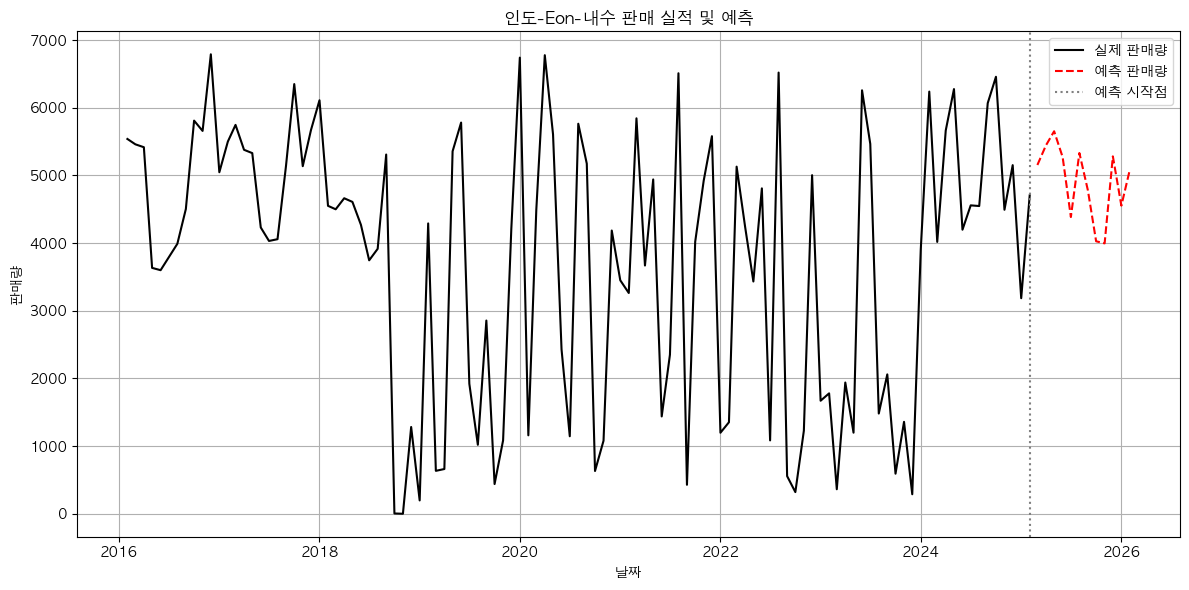

Í∑∏ÎûòÌîÑÍ∞Ä '../../images/result/Ïù∏ÎèÑ-Eon-ÎÇ¥Ïàò SARIMAX Í≥µÏû•Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°.png'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import os
import joblib

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def prepare_plant_series(df, plant_name):
    plant_data = df[df['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'] == plant_name].iloc[:, 2:].T
    plant_data.columns = ['y']
    plant_data.index = pd.to_datetime(plant_data.index)
    plant_data = plant_data.asfreq('MS')
    return plant_data

def train_sarimax_model(series):
    # (p,d,q) = (1,1,1), (P,D,Q,s) = (1,1,1,12): Í∏∞Î≥∏ Í≥ÑÏ†àÏÑ± Î™®Îç∏
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fit_model = model.fit(disp=False)
    return fit_model

def forecast_future(fit_model, series, periods):
    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=periods, freq='MS')
    forecast = fit_model.get_forecast(steps=periods)
    forecast_mean = forecast.predicted_mean

    result = pd.DataFrame({
        'Ïó∞ÎèÑ': future_dates.year,
        'Ïõî': future_dates.month,
        'ÏòàÏ∏° ÌåêÎß§Îüâ': forecast_mean.values
    })
    return result

def plot_series_with_forecast(series, forecast_result, plant_name, save_path=None):
    # Ïã§Ï†úÍ∞í
    actual = series.copy()
    
    # ÏòàÏ∏° ÎÇ†Ïßú Íµ¨ÏÑ±
    forecast_index = pd.to_datetime(forecast_result['Ïó∞ÎèÑ'].astype(str) + '-' + forecast_result['Ïõî'].astype(str))
    forecast_series = pd.Series(forecast_result['ÏòàÏ∏° ÌåêÎß§Îüâ'].values, index=forecast_index)
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual['y'], label='Ïã§Ï†ú ÌåêÎß§Îüâ', color='black')
    plt.plot(forecast_series.index, forecast_series.values, label='ÏòàÏ∏° ÌåêÎß§Îüâ', color='red', linestyle='--')
    
    plt.axvline(x=actual.index[-1], color='gray', linestyle=':', label='ÏòàÏ∏° ÏãúÏûëÏ†ê')
    plt.title(f"{plant_name} ÌåêÎß§ Ïã§Ï†Å Î∞è ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel("ÌåêÎß§Îüâ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    save_path = f"../../images/result/{plant_name} SARIMAX Í≥µÏû•Î≥Ñ ÌåêÎß§Îüâ ÏòàÏ∏°.png"

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if save_path:
        plt.savefig(save_path, dpi=300)  # Ìï¥ÏÉÅÎèÑ Ï°∞Ï†ï Í∞ÄÎä•
        print(f"Í∑∏ÎûòÌîÑÍ∞Ä '{save_path}'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    plt.show()


file_path = "../../data/processed/Í≥µÏû•Î≥ÑÌåêÎß§ Î≥µÏÇ¨Î≥∏.csv"
df = pd.read_csv(file_path)

# Ï†ÑÏ≤òÎ¶¨: Ïù∏Îç±Ïä§ ÌÜµÌï©
df['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'] = df['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'].astype(str) + '-' + df['Ï∞®Ï¢Ö'].astype(str).str.zfill(2) + '-' + df['Í±∞Îûò Íµ¨Î∂Ñ'].astype(str).str.zfill(2)
df = df.drop(columns=['Ï∞®Ï¢Ö', 'Í±∞Îûò Íµ¨Î∂Ñ'])
cols = ['Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)'] + [col for col in df.columns if col != 'Í≥µÏû•Î™Ö(Íµ≠Í∞Ä)']
df = df[cols]

plant_name = "Ïù∏ÎèÑ-Eon-ÎÇ¥Ïàò"
forecast_months = 12



def get_model_path(plant_name):
    return f"../../models/sarimax_plant_{plant_name}_model.pkl"

def ensure_model(plant_name):
    model_path = get_model_path(plant_name)

    if os.path.exists(model_path):
        print(f"‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏Ïù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§: {model_path}")
        return True
    else:
        print(f"üöÄ Î™®Îç∏Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏÉàÎ°ú ÌïôÏäµÌï©ÎãàÎã§: {model_path}")
        return False

status = ensure_model(plant_name)

if status:
    model = joblib.load(get_model_path(plant_name))
else:
    plant_series = prepare_plant_series(df, plant_name)
    model = train_sarimax_model(plant_series)
    joblib.dump(model, f"../../models/sarimax_plant_{plant_name}_model.pkl")

forecast_result = forecast_future(model, plant_series, forecast_months)
plot_series_with_forecast(plant_series, forecast_result, plant_name)